<a href="https://colab.research.google.com/github/imbhavi247/Cognitive-Assignments/blob/main/Assignment_7_Cognitive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. You are a data analyst at an e-commerce company. Your task is to analyze sales data,
clean and process it, perform staƟsƟcal analysis, and generate visual insights to help the
business make informed decisions.
1. Use your roll number as the random seed to generate unique data for each student.
2. Follow the quesƟons step by step, as each part builds upon the previous one.
3. Submit the assignment as a Jupyter Notebook (.ipynb) with:
 Well-documented code and clear comments.
 Markdown explanaƟons for each step.
 Screenshots of the plots and outputs.

Checking for missing values:
 Month          0
Product_A      0
Product_B      0
Product_C      0
Total_Sales    0
dtype: int64
Basic statistics:
            Month   Product_A  Product_B  Product_C  Total_Sales
count  12.000000   12.000000  12.000000  12.000000    12.000000
mean    6.500000   92.750000  63.333333  42.166667   198.250000
std     3.605551   32.819409  18.435802  20.621407    46.112757
min     1.000000   51.000000  37.000000  20.000000   142.000000
25%     3.750000   75.250000  50.000000  25.000000   167.250000
50%     6.500000   85.000000  63.500000  34.500000   192.500000
75%     9.250000  114.250000  76.000000  64.000000   214.250000
max    12.000000  148.000000  91.000000  75.000000   295.000000


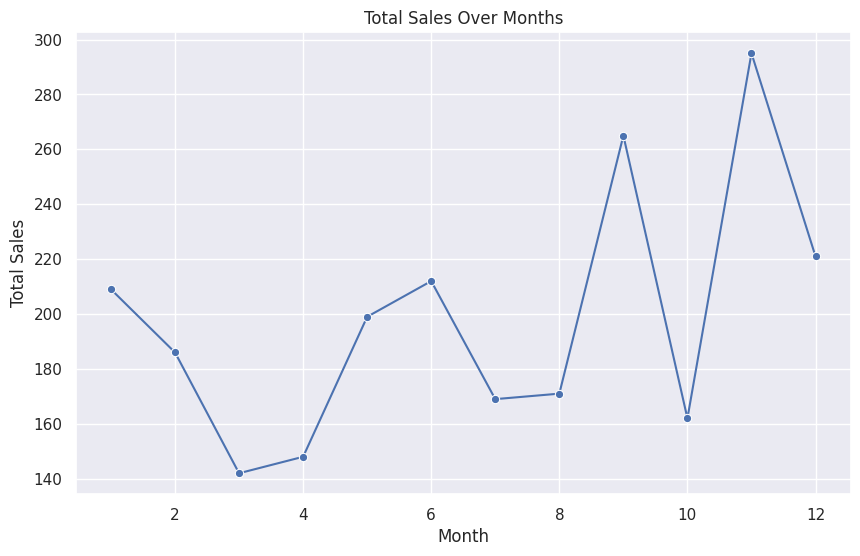

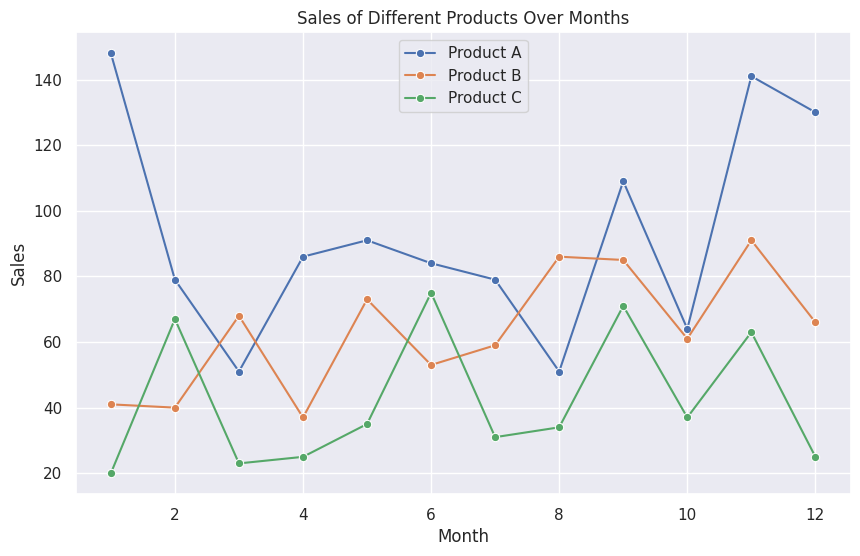

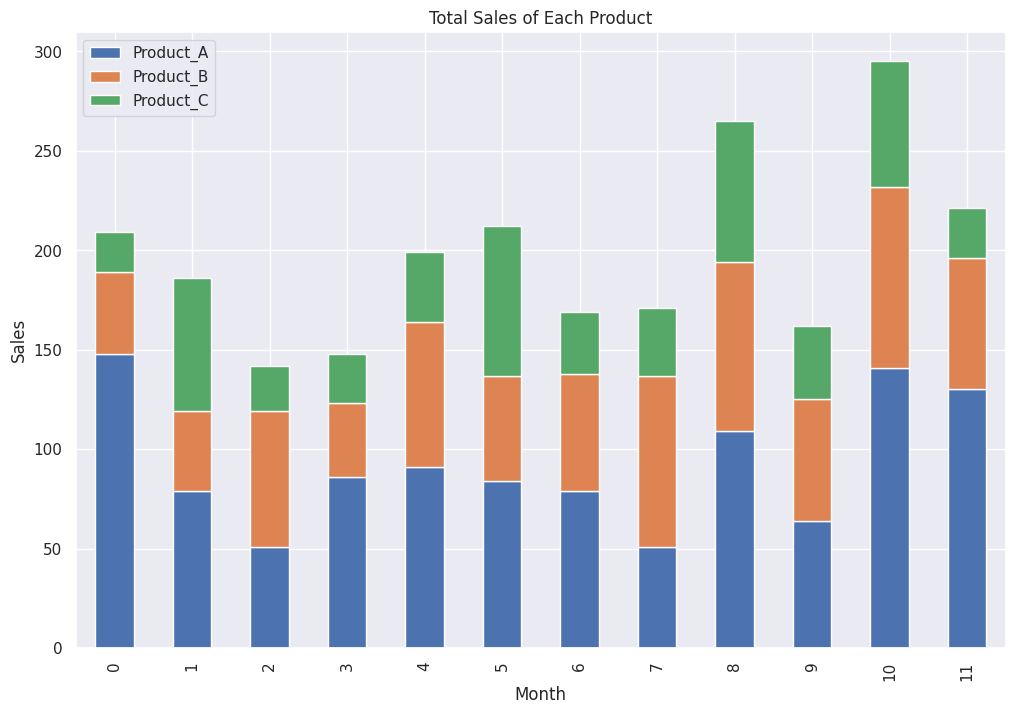

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

roll_number = 12345
np.random.seed(roll_number)

months = np.arange(1, 13)
product_A = np.random.randint(50, 150, size=12)
product_B = np.random.randint(30, 100, size=12)
product_C = np.random.randint(20, 80, size=12)
total_sales = product_A + product_B + product_C

data = {
    'Month': months,
    'Product_A': product_A,
    'Product_B': product_B,
    'Product_C': product_C,
    'Total_Sales': total_sales
}
df = pd.DataFrame(data)

print("Checking for missing values:\n", df.isnull().sum())

stats = df.describe()
print("Basic statistics:\n", stats)

plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Total_Sales', data=df, marker='o')
plt.title('Total Sales Over Months')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Product_A', data=df, marker='o', label='Product A')
sns.lineplot(x='Month', y='Product_B', data=df, marker='o', label='Product B')
sns.lineplot(x='Month', y='Product_C', data=df, marker='o', label='Product C')
plt.title('Sales of Different Products Over Months')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

df[['Product_A', 'Product_B', 'Product_C']].plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Total Sales of Each Product')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


Part I: Randomized Sales Data GeneraƟon (NumPy)
1. IniƟalize Random Seed
2. Generate Sales Data
 Create a NumPy array of random sales data for 12 months (shape = (12, 4)),
where each column represents a product category:
 Electronics, Clothing, Home & Kitchen, Sports.
 Sales values should be between 1000 and 5000 units per month.
 The range should be randomized using the seed.
3. Convert to DataFrame
 Convert the cleaned NumPy array into a Pandas DataFrame with:
i. Columns: Electronics, Clothing, Home & Kitchen, Sports
ii. Index: Months from Jan to Dec

In [ ]:
import numpy as np
import pandas as pd

roll_number = 12345
np.random.seed(roll_number)


sales_data = np.random.randint(1000, 5001, size=(12, 4))

columns = ['Electronics', 'Clothing', 'Home & Kitchen', 'Sports']
index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df = pd.DataFrame(sales_data, columns=columns, index=index)

print("Generated Sales Data:")
print(df)


Generated Sales Data:
     Electronics  Clothing  Home & Kitchen  Sports
Jan         1482      4557            4357    3177
Feb         4492      4497            1382    4429
Mar         1546      4613            3817    4190
Apr         4441      4387            3702    3153
May         4163      3807            2398    4280
Jun         1882      1713            1267    4149
Jul         2674      1081            2746    3214
Aug         3311      1043            1231    1023
Sep         2053      4000            4511    2311
Oct         1701      1353            2883    1855
Nov         3084      3624            1387    3812
Dec         2148      2669            4215    1631


Part II: Data ManipulaƟon and Analysis (Pandas)
1. Display the first 5 rows and summary staƟsƟcs of the DataFrame.
2. Calculate the total sales per category and total sales per month.
3. Calculate the average sales growth between consecuƟve months for each category.
4. Add the following columns to the DataFrame:
 Total Sales: Sum of all categories per month.
 Growth Rate: Percentage change in Total Sales from the previous month.
5. Apply a randomized discount:
 If your roll number is even, apply a 10% discount to the Electronics category.
 If odd, apply a 15% discount to the Clothing category.


In [ ]:
import numpy as np
import pandas as pd

roll_number = 12345
np.random.seed(roll_number)

sales_data = np.random.randint(1000, 5001, size=(12, 4))
columns = ['Electronics', 'Clothing', 'Home & Kitchen', 'Sports']
index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df = pd.DataFrame(sales_data, columns=columns, index=index)


print("First 5 rows of the DataFrame:")
print(df.head())

print("\nSummary statistics of the DataFrame:")
print(df.describe())

total_sales_per_category = df.sum()
total_sales_per_month = df.sum(axis=1)

print("\nTotal sales per category:")
print(total_sales_per_category)

print("\nTotal sales per month:")
print(total_sales_per_month)

avg_sales_growth = df.pct_change().mean() * 100
print("\nAverage sales growth between consecutive months for each category (in %):")
print(avg_sales_growth)


df['Total Sales'] = df.sum(axis=1)
df['Growth Rate'] = df['Total Sales'].pct_change() * 100

print("\nDataFrame with Total Sales and Growth Rate columns added:")
print(df)

if roll_number % 2 == 0:
    df['Electronics'] = df['Electronics'] * 0.9
else:
    df['Clothing'] = df['Clothing'] * 0.85

print("\nDataFrame after applying the discount:")
print(df)


First 5 rows of the DataFrame:
     Electronics  Clothing  Home & Kitchen  Sports
Jan         1482      4557            4357    3177
Feb         4492      4497            1382    4429
Mar         1546      4613            3817    4190
Apr         4441      4387            3702    3153
May         4163      3807            2398    4280

Summary statistics of the DataFrame:
       Electronics     Clothing  Home & Kitchen       Sports
count    12.000000    12.000000       12.000000    12.000000
mean   2748.083333  3112.000000     2824.666667  3102.000000
std    1131.455254  1448.254184     1285.766085  1152.870252
min    1482.000000  1043.000000     1231.000000  1023.000000
25%    1836.750000  1623.000000     1385.750000  2197.000000
50%    2411.000000  3715.500000     2814.500000  3195.500000
75%    3524.000000  4414.500000     3916.500000  4159.250000
max    4492.000000  4613.000000     4511.000000  4429.000000

Total sales per category:
Electronics       32977
Clothing          37344
H

Part III: VisualizaƟons (Matplotlib and Seaborn)
1. Plot monthly sales trends for each category using line plots.
2. Create the following plots:
 Box plots to show the sales distribuƟon for each category.


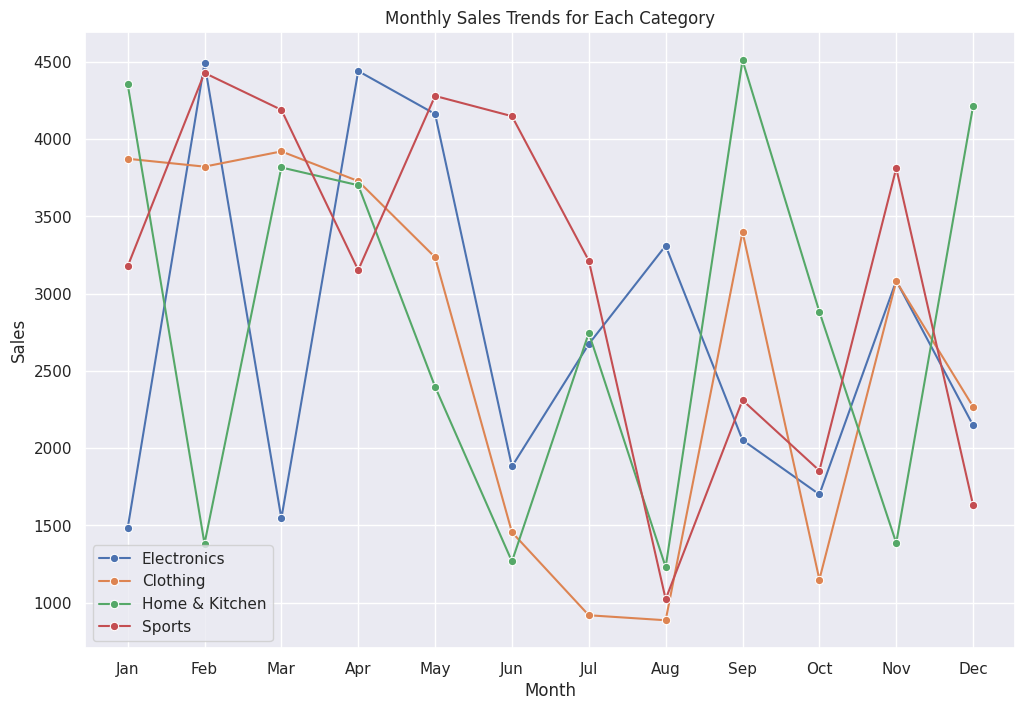

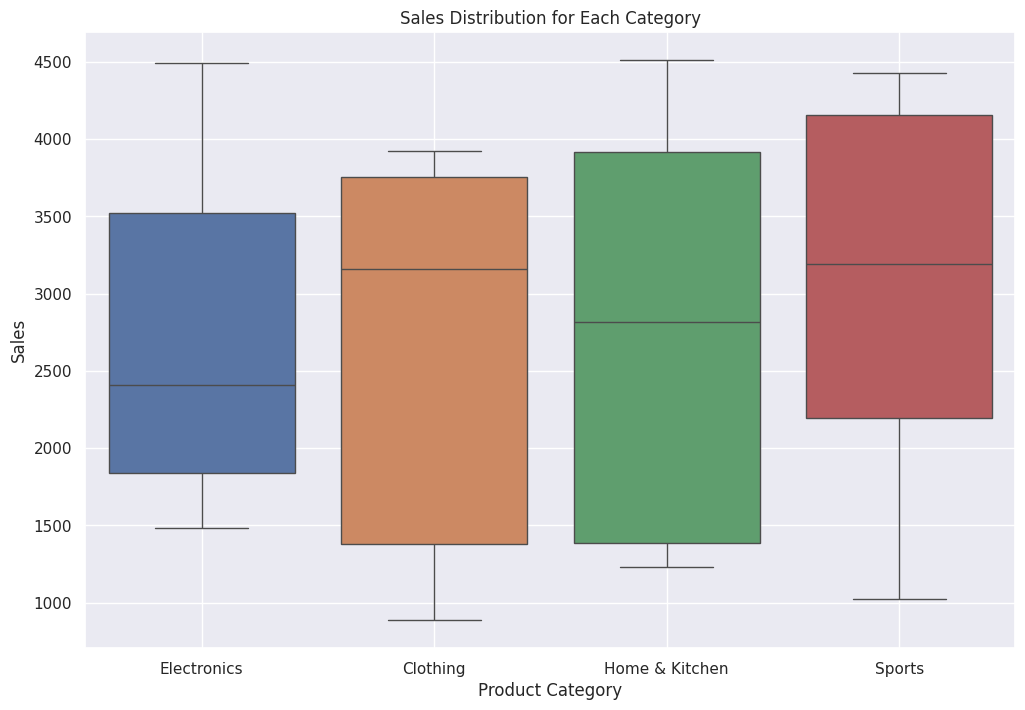

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Plot monthly sales trends for each category using line plots
plt.figure(figsize=(12, 8))
sns.lineplot(x=df.index, y='Electronics', data=df, marker='o', label='Electronics')
sns.lineplot(x=df.index, y='Clothing', data=df, marker='o', label='Clothing')
sns.lineplot(x=df.index, y='Home & Kitchen', data=df, marker='o', label='Home & Kitchen')
sns.lineplot(x=df.index, y='Sports', data=df, marker='o', label='Sports')
plt.title('Monthly Sales Trends for Each Category')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# 2. Create box plots to show the sales distribution for each category
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Electronics', 'Clothing', 'Home & Kitchen', 'Sports']])
plt.title('Sales Distribution for Each Category')
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


Q.2 For the array: array = np.array([[1, -2, 3],[-4, 5, -6]])
 i. Find element-wise absolute value
ii. Find the 25th, 50th, and 75th percenƟle of flaƩened array, for each column, for each
row.
iii. Mean, Median and Standard DeviaƟon of flaƩened array, of each column, and
each row

In [ ]:
import numpy as np

array = np.array([[1, -2, 3], [-4, 5, -6]])

# i. Find element-wise absolute value
abs_array = np.abs(array)
print("Element-wise absolute value:\n", abs_array)

# ii. Find the 25th, 50th, and 75th percentile of flattened array, for each column, for each row
flattened_array = array.flatten()

percentiles_flattened = np.percentile(flattened_array, [25, 50, 75])
print("\nPercentiles of flattened array:\n25th: {}\n50th: {}\n75th: {}".format(
    percentiles_flattened[0], percentiles_flattened[1], percentiles_flattened[2]
))

percentiles_columns = np.percentile(array, [25, 50, 75], axis=0)
print("\nPercentiles for each column:\n25th: {}\n50th: {}\n75th: {}".format(
    percentiles_columns[0], percentiles_columns[1], percentiles_columns[2]
))

percentiles_rows = np.percentile(array, [25, 50, 75], axis=1)
print("\nPercentiles for each row:\n25th: {}\n50th: {}\n75th: {}".format(
    percentiles_rows[0], percentiles_rows[1], percentiles_rows[2]
))

# iii. Mean, Median, and Standard Deviation of flattened array, of each column, and each row
mean_flattened = np.mean(flattened_array)
median_flattened = np.median(flattened_array)
std_flattened = np.std(flattened_array)

print("\nFlattened array statistics:\nMean: {}\nMedian: {}\nStandard Deviation: {}".format(
    mean_flattened, median_flattened, std_flattened
))

mean_columns = np.mean(array, axis=0)
median_columns = np.median(array, axis=0)
std_columns = np.std(array, axis=0)

print("\nColumn-wise statistics:\nMean: {}\nMedian: {}\nStandard Deviation: {}".format(
    mean_columns, median_columns, std_columns
))

mean_rows = np.mean(array, axis=1)
median_rows = np.median(array, axis=1)
std_rows = np.std(array, axis=1)

print("\nRow-wise statistics:\nMean: {}\nMedian: {}\nStandard Deviation: {}".format(
    mean_rows, median_rows, std_rows
))


Element-wise absolute value:
 [[1 2 3]
 [4 5 6]]

Percentiles of flattened array:
25th: -3.5
50th: -0.5
75th: 2.5

Percentiles for each column:
25th: [-2.75 -0.25 -3.75]
50th: [-1.5  1.5 -1.5]
75th: [-0.25  3.25  0.75]

Percentiles for each row:
25th: [-0.5 -5. ]
50th: [ 1. -4.]
75th: [2.  0.5]

Flattened array statistics:
Mean: -0.5
Median: -0.5
Standard Deviation: 3.8622100754188224

Column-wise statistics:
Mean: [-1.5  1.5 -1.5]
Median: [-1.5  1.5 -1.5]
Standard Deviation: [2.5 3.5 4.5]

Row-wise statistics:
Mean: [ 0.66666667 -1.66666667]
Median: [ 1. -4.]
Standard Deviation: [2.05480467 4.78423336]


Q.3 For the array: a = np.array([-1.8, -1.6, -0.5, 0.5,1.6, 1.8, 3.0]).
 i. Find floor, ceiling and truncated value, rounded values


In [ ]:
import numpy as np

a = np.array([-1.8, -1.6, -0.5, 0.5, 1.6, 1.8, 3.0])

# i. Find floor, ceiling, truncated, and rounded values
floor_values = np.floor(a)
ceiling_values = np.ceil(a)
truncated_values = np.trunc(a)
rounded_values = np.round(a)

print("Original array:", a)
print("Floor values:", floor_values)
print("Ceiling values:", ceiling_values)
print("Truncated values:", truncated_values)
print("Rounded values:", rounded_values)


Original array: [-1.8 -1.6 -0.5  0.5  1.6  1.8  3. ]
Floor values: [-2. -2. -1.  0.  1.  1.  3.]
Ceiling values: [-1. -1. -0.  1.  2.  2.  3.]
Truncated values: [-1. -1. -0.  0.  1.  1.  3.]
Rounded values: [-2. -2. -0.  0.  2.  2.  3.]


Q.4 WAP to swap two elements in a list in Python Using a Temporary Variable.

In [ ]:
def swap_elements(lst, index1, index2):
    temp = lst[index1]
    lst[index1] = lst[index2]
    lst[index2] = temp
    return lst

example_list = [10, 20, 30, 40, 50]
index1, index2 = 1, 3

swapped_list = swap_elements(example_list, index1, index2)
print("List after swapping elements at indices {} and {}: {}".format(index1, index2, swapped_list))


List after swapping elements at indices 1 and 3: [10, 40, 30, 20, 50]


Q.5 Write a Python program to swap two elements in a set by converƟng it to a list first.

In [ ]:
def swap_elements_in_set(s, element1, element2):
    lst = list(s)

    index1, index2 = lst.index(element1), lst.index(element2)

    temp = lst[index1]
    lst[index1] = lst[index2]
    lst[index2] = temp

    swapped_set = set(lst)

    return swapped_set

example_set = {10, 20, 30, 40, 50}
element1, element2 = 20, 40

swapped_set = swap_elements_in_set(example_set, element1, element2)
print("Set after swapping elements {} and {}: {}".format(element1, element2, swapped_set))


Set after swapping elements 20 and 40: {40, 10, 50, 20, 30}
